In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import pandas as pd
import sklearn as sk
import tensorflow as tf

In [1]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


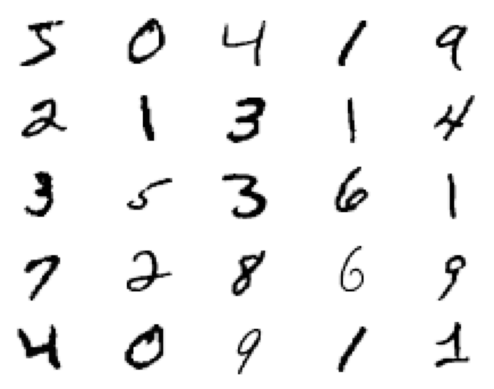

In [4]:
from matplotlib import pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500,noise=0.3,random_state=3)

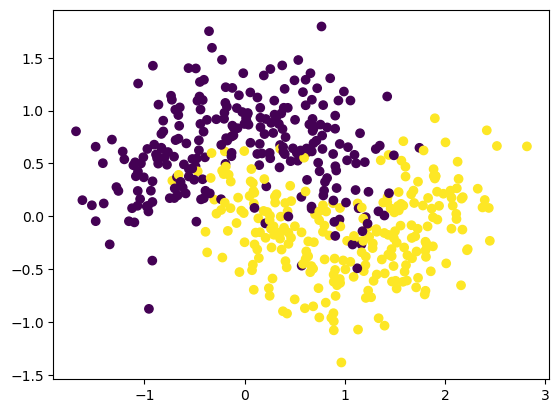

In [8]:
#plot
plt.scatter(X[:,0],X[:,1],c=y)

## Recipe to Building and Artificial Neural Network

    configure a model, give:
        architecture
        number of neurons
        layers
        type of activation functions

    compile the model, give:
        optimizers (algorithm that finds the minimum of the loss function)
        loss function (the loss function to be optimized; we choose the loss function depending on the problem we are solving)
        metrics (metrics to be tracked over training)

    fitting the model, give:
        epochs (number of iterations of the dataset in training)
        batch size (the data is fed in batches; not all data at once)
        Determines which fraction of the data is used as a validation set

    Evaluate

    Make predictions



#### 1. Simple configuration

Individual dense layers mapped one by one. Different types of layers are described here, e.g.


In [9]:
X[0].shape

(2,)

In [10]:
from tensorflow.keras import backend as K

K.clear_session()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.optimizers import Adam,SGD

model = Sequential()
# run this as soon as you want to restart creating a model!

In [11]:
X[0]

array([-0.46977994,  1.09371522])

In [27]:
import tensorflow as tf

# define your model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2, )),
    tf.keras.layers.Dense(64, activation='softmax')
])

# generate some input data with the correct shape
input_data = tf.ones((1, 2))

# call the model on the input data
output = model(input_data)


**Hidden layers**

In [28]:
model.add(Dense(units=32,activation='sigmoid',name='hiddenlayer_2'))

#### Output layer

In [29]:
# last layer parameters
# binary classification problem (o/p 0 or 1, number of neurons in final Dense layer = 1
 # and use sigmoid activation for the final layer
# multi-class classification problem, final layer activation is softmax

# hidden layers recommended to use relu

# final layer
model.add(Dense(units=1,activation='sigmoid')) #last layer no. of units = objects to classify
# sigmoid for binary problem / softmax for multi class problem - classification

In [30]:
#summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                96        
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 hiddenlayer_2 (Dense)       (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________


Where did 12 parameters in the first layer come from? Think about the architecture.
## 2. Compilation

This is where Keras actually communicates with TensorFlow and creates what's called a 'computation graph'. Keras is compiling our model into a very abstract form that is implemented in C++.

One caveat about compile -- if you run this piece of code more than once in a single session, Keras will get confused.

Running Keras in Jupyter is fine, but remember:

`from tensforflow.keras import backend as K
 K.clear_session()` 

You should do this everytime you use Keras, because it will clear the memory of the previously compiled model every time.


In [31]:
# optimizer - the algorithm used to optimize the weights
#loss - how the loss is quantified (real values)
# metrics - how good the model performs (not used by opt. algorithm)

model.compile(optimizer=Adam(learning_rate=0.1),loss='binary_crossentropy',metrics='accuracy') # 0.1,0.01,0.001

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

### 3. Fit the model to training data

Batch size: Number of samples per gradient update.

hint: Machine Learning Glossary (in case you don't remember the meaning of a certain ML term)


In [33]:
training = model.fit(X,y,epochs=787,validation_split=0.2,batch_size=10)#,callbacks=callback)

Epoch 1/787
40/40 [==============================] - 2s 22ms/step - loss: 0.5390 - accuracy: 0.7700 - val_loss: 0.6182 - val_accuracy: 0.8000
Epoch 2/787
40/40 [==============================] - 0s 7ms/step - loss: 0.4377 - accuracy: 0.8275 - val_loss: 0.3959 - val_accuracy: 0.8700
Epoch 3/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3728 - accuracy: 0.8675 - val_loss: 0.4290 - val_accuracy: 0.8500
Epoch 4/787
40/40 [==============================] - 0s 6ms/step - loss: 0.4235 - accuracy: 0.8550 - val_loss: 0.4626 - val_accuracy: 0.8400
Epoch 5/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3878 - accuracy: 0.8700 - val_loss: 0.3999 - val_accuracy: 0.8600
Epoch 6/787
40/40 [==============================] - 0s 6ms/step - loss: 0.4331 - accuracy: 0.8425 - val_loss: 0.4315 - val_accuracy: 0.8700
Epoch 7/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3927 - accuracy: 0.8750 - val_loss: 0.3759 - val_accuracy: 0.8900
Epoch 8/787


Epoch 59/787
40/40 [==============================] - 0s 5ms/step - loss: 0.4181 - accuracy: 0.8550 - val_loss: 0.4231 - val_accuracy: 0.8500
Epoch 60/787
40/40 [==============================] - 0s 5ms/step - loss: 0.4192 - accuracy: 0.8575 - val_loss: 0.4238 - val_accuracy: 0.8500
Epoch 61/787
40/40 [==============================] - 0s 6ms/step - loss: 0.4114 - accuracy: 0.8600 - val_loss: 0.3524 - val_accuracy: 0.8900
Epoch 62/787
40/40 [==============================] - 0s 7ms/step - loss: 0.3916 - accuracy: 0.8650 - val_loss: 0.3526 - val_accuracy: 0.8900
Epoch 63/787
40/40 [==============================] - 0s 7ms/step - loss: 0.4078 - accuracy: 0.8625 - val_loss: 0.3472 - val_accuracy: 0.8900
Epoch 64/787
40/40 [==============================] - 0s 7ms/step - loss: 0.3975 - accuracy: 0.8675 - val_loss: 0.3434 - val_accuracy: 0.8900
Epoch 65/787
40/40 [==============================] - 0s 7ms/step - loss: 0.3800 - accuracy: 0.8775 - val_loss: 0.3468 - val_accuracy: 0.8900
Epoch 

40/40 [==============================] - 0s 5ms/step - loss: 0.3993 - accuracy: 0.8650 - val_loss: 0.3394 - val_accuracy: 0.8900
Epoch 117/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3926 - accuracy: 0.8650 - val_loss: 0.3374 - val_accuracy: 0.8900
Epoch 118/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3896 - accuracy: 0.8650 - val_loss: 0.3393 - val_accuracy: 0.8900
Epoch 119/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3992 - accuracy: 0.8650 - val_loss: 0.3331 - val_accuracy: 0.8900
Epoch 120/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3979 - accuracy: 0.8650 - val_loss: 0.3372 - val_accuracy: 0.8900
Epoch 121/787
40/40 [==============================] - 0s 6ms/step - loss: 0.4044 - accuracy: 0.8650 - val_loss: 0.3332 - val_accuracy: 0.8900
Epoch 122/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3949 - accuracy: 0.8650 - val_loss: 0.3382 - val_accuracy: 0.8900
Epoch 123/787

40/40 [==============================] - 0s 5ms/step - loss: 0.3977 - accuracy: 0.8650 - val_loss: 0.3353 - val_accuracy: 0.8900
Epoch 174/787
40/40 [==============================] - 0s 10ms/step - loss: 0.3936 - accuracy: 0.8650 - val_loss: 0.3336 - val_accuracy: 0.8900
Epoch 175/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3937 - accuracy: 0.8650 - val_loss: 0.3389 - val_accuracy: 0.8900
Epoch 176/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3939 - accuracy: 0.8650 - val_loss: 0.3347 - val_accuracy: 0.8900
Epoch 177/787
40/40 [==============================] - 0s 5ms/step - loss: 0.4008 - accuracy: 0.8650 - val_loss: 0.3498 - val_accuracy: 0.8900
Epoch 178/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3952 - accuracy: 0.8650 - val_loss: 0.3391 - val_accuracy: 0.8900
Epoch 179/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3943 - accuracy: 0.8650 - val_loss: 0.3480 - val_accuracy: 0.8900
Epoch 180/78

40/40 [==============================] - 0s 5ms/step - loss: 0.3944 - accuracy: 0.8650 - val_loss: 0.3353 - val_accuracy: 0.8900
Epoch 231/787
40/40 [==============================] - 0s 6ms/step - loss: 0.4042 - accuracy: 0.8650 - val_loss: 0.3401 - val_accuracy: 0.8900
Epoch 232/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3932 - accuracy: 0.8650 - val_loss: 0.3417 - val_accuracy: 0.8900
Epoch 233/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.8650 - val_loss: 0.3399 - val_accuracy: 0.8900
Epoch 234/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3954 - accuracy: 0.8650 - val_loss: 0.3401 - val_accuracy: 0.8900
Epoch 235/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.8650 - val_loss: 0.3338 - val_accuracy: 0.8900
Epoch 236/787
40/40 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8650 - val_loss: 0.3441 - val_accuracy: 0.8900
Epoch 237/787

40/40 [==============================] - 0s 6ms/step - loss: 0.3940 - accuracy: 0.8650 - val_loss: 0.3359 - val_accuracy: 0.8900
Epoch 288/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.8650 - val_loss: 0.3357 - val_accuracy: 0.8900
Epoch 289/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3940 - accuracy: 0.8650 - val_loss: 0.3375 - val_accuracy: 0.8900
Epoch 290/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3958 - accuracy: 0.8650 - val_loss: 0.3327 - val_accuracy: 0.8900
Epoch 291/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3972 - accuracy: 0.8650 - val_loss: 0.3340 - val_accuracy: 0.8900
Epoch 292/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3977 - accuracy: 0.8650 - val_loss: 0.3358 - val_accuracy: 0.8900
Epoch 293/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3942 - accuracy: 0.8650 - val_loss: 0.3347 - val_accuracy: 0.8900
Epoch 294/787

40/40 [==============================] - 0s 5ms/step - loss: 0.3943 - accuracy: 0.8650 - val_loss: 0.3370 - val_accuracy: 0.8900
Epoch 345/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3953 - accuracy: 0.8650 - val_loss: 0.3340 - val_accuracy: 0.8900
Epoch 346/787
40/40 [==============================] - 0s 5ms/step - loss: 0.4008 - accuracy: 0.8650 - val_loss: 0.3343 - val_accuracy: 0.8900
Epoch 347/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3954 - accuracy: 0.8650 - val_loss: 0.3400 - val_accuracy: 0.8900
Epoch 348/787
40/40 [==============================] - 0s 5ms/step - loss: 0.4123 - accuracy: 0.8650 - val_loss: 0.3319 - val_accuracy: 0.8900
Epoch 349/787
40/40 [==============================] - 0s 5ms/step - loss: 0.4046 - accuracy: 0.8650 - val_loss: 0.3341 - val_accuracy: 0.8900
Epoch 350/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3986 - accuracy: 0.8650 - val_loss: 0.3328 - val_accuracy: 0.8900
Epoch 351/787

40/40 [==============================] - 0s 5ms/step - loss: 0.3928 - accuracy: 0.8650 - val_loss: 0.3359 - val_accuracy: 0.8900
Epoch 402/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3990 - accuracy: 0.8650 - val_loss: 0.3431 - val_accuracy: 0.8900
Epoch 403/787
40/40 [==============================] - 0s 7ms/step - loss: 0.3939 - accuracy: 0.8650 - val_loss: 0.3385 - val_accuracy: 0.8900
Epoch 404/787
40/40 [==============================] - 0s 7ms/step - loss: 0.3968 - accuracy: 0.8650 - val_loss: 0.3366 - val_accuracy: 0.8900
Epoch 405/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3958 - accuracy: 0.8650 - val_loss: 0.3388 - val_accuracy: 0.8900
Epoch 406/787
40/40 [==============================] - 0s 5ms/step - loss: 0.4000 - accuracy: 0.8650 - val_loss: 0.3499 - val_accuracy: 0.8900
Epoch 407/787
40/40 [==============================] - 0s 8ms/step - loss: 0.4019 - accuracy: 0.8650 - val_loss: 0.3392 - val_accuracy: 0.8900
Epoch 408/787

40/40 [==============================] - 0s 5ms/step - loss: 0.3939 - accuracy: 0.8650 - val_loss: 0.3345 - val_accuracy: 0.8900
Epoch 459/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3974 - accuracy: 0.8650 - val_loss: 0.3410 - val_accuracy: 0.8900
Epoch 460/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3977 - accuracy: 0.8650 - val_loss: 0.3371 - val_accuracy: 0.8900
Epoch 461/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3963 - accuracy: 0.8650 - val_loss: 0.3339 - val_accuracy: 0.8900
Epoch 462/787
40/40 [==============================] - 0s 5ms/step - loss: 0.4016 - accuracy: 0.8650 - val_loss: 0.3392 - val_accuracy: 0.8900
Epoch 463/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3946 - accuracy: 0.8650 - val_loss: 0.3379 - val_accuracy: 0.8900
Epoch 464/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3968 - accuracy: 0.8650 - val_loss: 0.3333 - val_accuracy: 0.8900
Epoch 465/787

40/40 [==============================] - 0s 6ms/step - loss: 0.3965 - accuracy: 0.8650 - val_loss: 0.3340 - val_accuracy: 0.8900
Epoch 516/787
40/40 [==============================] - 0s 6ms/step - loss: 0.4023 - accuracy: 0.8650 - val_loss: 0.3306 - val_accuracy: 0.8900
Epoch 517/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.8650 - val_loss: 0.3440 - val_accuracy: 0.8900
Epoch 518/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3933 - accuracy: 0.8650 - val_loss: 0.3332 - val_accuracy: 0.8900
Epoch 519/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3928 - accuracy: 0.8650 - val_loss: 0.3334 - val_accuracy: 0.8900
Epoch 520/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8650 - val_loss: 0.3399 - val_accuracy: 0.8900
Epoch 521/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3958 - accuracy: 0.8650 - val_loss: 0.3328 - val_accuracy: 0.8900
Epoch 522/787

40/40 [==============================] - 0s 7ms/step - loss: 0.4069 - accuracy: 0.8650 - val_loss: 0.4361 - val_accuracy: 0.8900
Epoch 573/787
40/40 [==============================] - 0s 6ms/step - loss: 0.4283 - accuracy: 0.8650 - val_loss: 0.3511 - val_accuracy: 0.8900
Epoch 574/787
40/40 [==============================] - 0s 6ms/step - loss: 0.4003 - accuracy: 0.8650 - val_loss: 0.3399 - val_accuracy: 0.8900
Epoch 575/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3965 - accuracy: 0.8650 - val_loss: 0.3329 - val_accuracy: 0.8900
Epoch 576/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3963 - accuracy: 0.8650 - val_loss: 0.3327 - val_accuracy: 0.8900
Epoch 577/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.8650 - val_loss: 0.3500 - val_accuracy: 0.8900
Epoch 578/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3998 - accuracy: 0.8650 - val_loss: 0.3372 - val_accuracy: 0.8900
Epoch 579/787

40/40 [==============================] - 0s 5ms/step - loss: 0.4161 - accuracy: 0.8650 - val_loss: 0.3537 - val_accuracy: 0.8900
Epoch 630/787
40/40 [==============================] - 0s 4ms/step - loss: 0.4110 - accuracy: 0.8650 - val_loss: 0.3345 - val_accuracy: 0.8900
Epoch 631/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3912 - accuracy: 0.8650 - val_loss: 0.3387 - val_accuracy: 0.8900
Epoch 632/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3951 - accuracy: 0.8650 - val_loss: 0.3313 - val_accuracy: 0.8900
Epoch 633/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3913 - accuracy: 0.8650 - val_loss: 0.3483 - val_accuracy: 0.8900
Epoch 634/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 0.8650 - val_loss: 0.3338 - val_accuracy: 0.8900
Epoch 635/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3942 - accuracy: 0.8650 - val_loss: 0.3377 - val_accuracy: 0.8900
Epoch 636/787

40/40 [==============================] - 0s 5ms/step - loss: 0.4000 - accuracy: 0.8650 - val_loss: 0.3530 - val_accuracy: 0.8900
Epoch 687/787
40/40 [==============================] - 0s 6ms/step - loss: 0.3973 - accuracy: 0.8650 - val_loss: 0.3348 - val_accuracy: 0.8900
Epoch 688/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3980 - accuracy: 0.8650 - val_loss: 0.3498 - val_accuracy: 0.8900
Epoch 689/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3935 - accuracy: 0.8650 - val_loss: 0.3396 - val_accuracy: 0.8900
Epoch 690/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3952 - accuracy: 0.8650 - val_loss: 0.3326 - val_accuracy: 0.8900
Epoch 691/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3993 - accuracy: 0.8650 - val_loss: 0.3369 - val_accuracy: 0.8900
Epoch 692/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3896 - accuracy: 0.8650 - val_loss: 0.3373 - val_accuracy: 0.8900
Epoch 693/787

40/40 [==============================] - 0s 6ms/step - loss: 0.3936 - accuracy: 0.8650 - val_loss: 0.3376 - val_accuracy: 0.8900
Epoch 744/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8650 - val_loss: 0.3362 - val_accuracy: 0.8900
Epoch 745/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3930 - accuracy: 0.8650 - val_loss: 0.3515 - val_accuracy: 0.8900
Epoch 746/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3996 - accuracy: 0.8650 - val_loss: 0.3376 - val_accuracy: 0.8900
Epoch 747/787
40/40 [==============================] - 0s 4ms/step - loss: 0.3907 - accuracy: 0.8650 - val_loss: 0.3339 - val_accuracy: 0.8900
Epoch 748/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3942 - accuracy: 0.8650 - val_loss: 0.3333 - val_accuracy: 0.8900
Epoch 749/787
40/40 [==============================] - 0s 5ms/step - loss: 0.3965 - accuracy: 0.8650 - val_loss: 0.3359 - val_accuracy: 0.8900
Epoch 750/787

In [34]:
(len(X) * 0.8)/64

6.25

##### What do the parameters mean?

    X: input values
    y: output labels/values (classification/regression)
    epochs: like the number of increments (forward-backward propagation)
    batch_size: number of samples used (reduces computational effort instead of using all samples => stochastic gradient)
    validation_split: portion of results used for validation

After training the model you can get the logs of loss/accuracy from history.


In [35]:
import pandas as pd 
logs = pd.DataFrame(training.history)

In [64]:
logs

,loss,accuracy,val_loss,val_accuracy
0,0.538999,0.7700,0.618228,0.80
1,0.437701,0.8275,0.395852,0.87
2,0.372822,0.8675,0.428959,0.85
3,0.423486,0.8550,0.462646,0.84
4,0.387810,0.8700,0.399862,0.86
...,...,...,...,...
782,0.397143,0.8650,0.338379,0.89
783,0.396550,0.8650,0.344136,0.89
784,0.396922,0.8650,0.341737,0.89
785,0.394068,0.8650,0.332904,0.89


## 4. Evaluation

In [36]:
training.history

{'loss': [0.5389989018440247,
  0.4377009868621826,
  0.37282249331474304,
  0.423485666513443,
  0.3878096044063568,
  0.4330810606479645,
  0.3926834166049957,
  0.3796396553516388,
  0.35655173659324646,
  0.3825452923774719,
  0.38396522402763367,
  0.4046182334423065,
  0.418659508228302,
  0.46097052097320557,
  0.4814920723438263,
  0.47682273387908936,
  0.3848861753940582,
  0.3641135096549988,
  0.4349971115589142,
  0.3936244249343872,
  0.3666418492794037,
  0.3287349045276642,
  0.374978631734848,
  0.37712857127189636,
  0.40336981415748596,
  0.3997061848640442,
  0.3943515419960022,
  0.3860834836959839,
  0.3715517520904541,
  0.42183220386505127,
  0.44734060764312744,
  0.3993494510650635,
  0.36360791325569153,
  0.3545326888561249,
  0.4141933023929596,
  0.3922501802444458,
  0.4042310416698456,
  0.42495688796043396,
  0.4375006854534149,
  0.4058878421783447,
  0.40345534682273865,
  0.41980084776878357,
  0.3906290829181671,
  0.3686657249927521,
  0.4004153907

<Axes: >

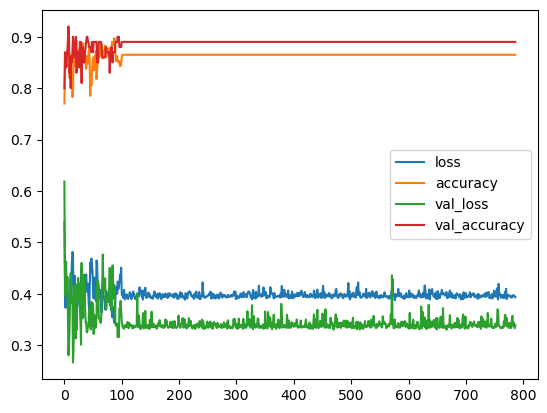

In [37]:
logs.plot()


<Axes: >

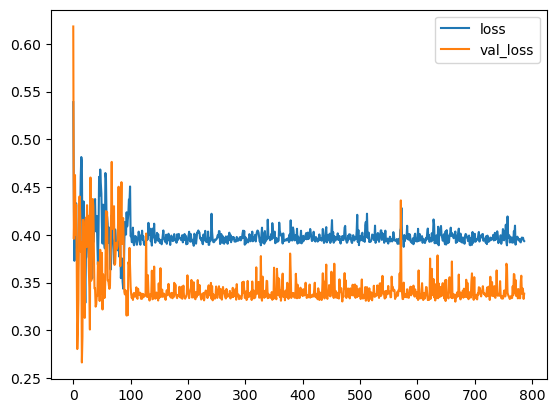

In [38]:
logs[['loss','val_loss']].plot()

### 5. Predictions

(Solution to our challenge)
Let's assume, we want to know, whether the point (0.5, -0.5) belongs to the upper or lower half moon.
We can predict this categorical problem with our just created model.
According to our X and y (see above), zeros belong to the upper half moon, ones to the lower.


In [39]:
model.evaluate(X,y)

16/16 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8700


[0.38182953000068665, 0.8700000047683716]

In [40]:
ypred = np.round(model.predict(X))

16/16 [==============================] - 0s 3ms/step


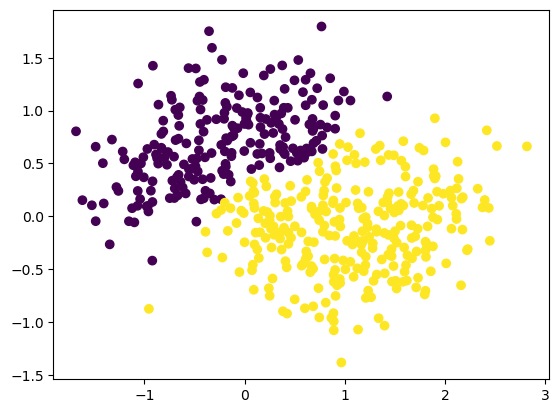

In [41]:
plt.scatter(X[:,0],X[:,1],c=ypred)

In [42]:
X[1]

array([0.0886007 , 0.23960233])

In [43]:
y[1]

1

In [44]:
X.shape

(500, 2)

In [45]:
X[1].shape

(2,)

In [46]:
y[1].shape

()

In [47]:
np.round(model.predict(np.expand_dims([-1.5 , 1.5],axis=0)))

1/1 [==============================] - 0s 59ms/step


array([[0.]], dtype=float32)

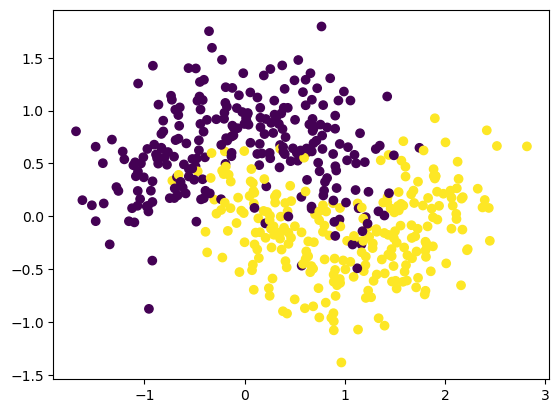

In [48]:
plt.scatter(X[:,0],X[:,1],c=y)


In [65]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(model,
   to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## How to save a model for later use

In [56]:
from tensorflow.keras.models import load_model

model.save("model_moons.h5")
# here you can stop your notebook
moons_model = load_model("model_moons.h5")
moons_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                96        
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 hiddenlayer_2 (Dense)       (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,321
Trainable params: 4,321
Non-trainable params: 0
_________________________________________________________________


In [57]:
# check the final weights that are learnt
model.get_weights()

[array([[ -0.32500005,   8.537979  ,   7.798641  ,   0.10530904,
          -7.7377815 ,  -0.04957525,  -2.7428324 ,   1.7425518 ,
           6.5614986 ,  -1.6623523 ,  -0.9188367 ,   0.27092135,
          -0.2758731 ,   5.606587  ,   8.290704  ,   0.06832469,
          -0.44519627,  -0.70196956,  -0.14373013,   2.3582945 ,
          -1.6983869 ,  -0.136854  ,  -2.1802843 ,  -1.5827297 ,
          -0.4163121 , -15.588631  ,  -0.38062772,   3.922789  ,
          -6.1013007 , -13.258963  ,   3.732731  ,  -5.572637  ],
        [  0.36123148,  -7.7320757 ,  -7.366439  ,  -0.32283044,
           1.0415778 ,  -0.61864126,   2.1373138 ,  -7.597746  ,
          -6.9575224 ,   9.637392  ,  -0.4823307 ,   9.857718  ,
          -0.3620077 , -10.671648  ,  -5.7713175 ,   0.20938943,
          -0.6496149 ,   1.3087764 ,  -1.5061798 ,  -9.04114   ,
           8.196682  ,   0.50670743,   8.390473  ,   1.9929402 ,
         -11.253844  ,   4.754759  ,  -7.2196116 , -11.523504  ,
           0.17660019,  

## Alternative model configuration with keras.layers

Many many more layer options than what we are doing exist.

Checkout https://www.tensorflow.org/api_docs/python/tf/keras/layers


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [59]:
model_ = Sequential([
    # InputLayer(input_shape=X[0].shape),
    Dense(units=4,activation='relu',input_shape=X[0].shape),
    Dense(units=1,activation='sigmoid')
])

In [60]:
model_.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Text(50.722222222222214, 0.5, 'y_true')

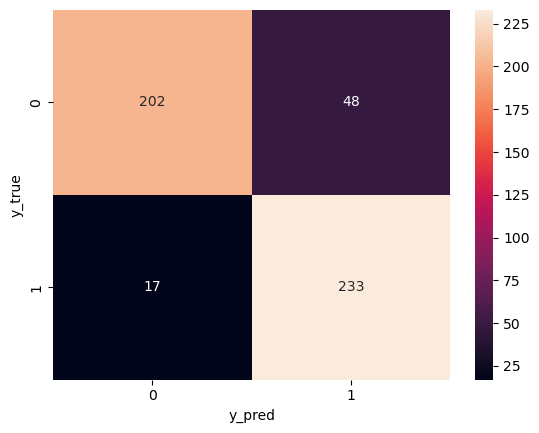

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y,ypred),annot=True,fmt='.3g')
plt.xlabel('y_pred')
plt.ylabel('y_true')

In [63]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([250, 250], dtype=int64))

Summary

    We spoke about what a tensor is (n-dimensional array).
    We tried out several network parameters (activation functions, # layers/nodes, ...) in tensorflow playground.
    We learnt to know and used keras API to create a neural network model.
    We performed a challenge on the two half moon problem.
    We saved and loaded the model for later use



In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

xtrain_flat = xtrain.reshape(xtrain.shape[0], -1)
xtest_flat = xtest.reshape(xtest.shape[0], -1)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(xtrain_flat, ytrain)

# Evaluate the model on training and test sets
train_score = clf.score(xtrain_flat, ytrain)
test_score = clf.score(xtest_flat, ytest)
print("Training score: {:.2f}".format(train_score))
print("Test score: {:.2f}".format(test_score))

C:\Users\ReDI\anaconda3\envs\your_project_name\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.93
Test score: 0.93
